In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [3]:
np.random.seed(1)
tf.set_random_seed(1)

In [4]:
# load data
TRAIN_URL = "http://download.tensorflow.org/data/iris_training.csv"
TEST_URL = "http://download.tensorflow.org/data/iris_test.csv"

CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

train = pd.read_csv(TRAIN_URL, header=0, names=CSV_COLUMN_NAMES)
test = pd.read_csv(TEST_URL, header=0, names=CSV_COLUMN_NAMES)

x_train = train[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']].values
y_train = train[['Species']].values

x_test = test[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']].values
y_test = test[['Species']].values

In [5]:
# construct model
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer((4,)))
model.add(tf.keras.layers.Dense(2))
model.add(tf.keras.layers.Dense(len(SPECIES), activation='softmax'))

model.compile(optimizer=tf.train.AdagradOptimizer(learning_rate=0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

In [6]:
# train
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10)

history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    batch_size=10, epochs=100, shuffle=True,
                    callbacks=[early_stopping])

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 665us/step - loss: 1.2388 - sparse_categorical_accuracy: 0.4167 - val_loss: 0.8739 - val_sparse_categorical_accuracy: 0.5333
Epoch 2/100
120/120 [==============================] - 0s 67us/step - loss: 0.5396 - sparse_categorical_accuracy: 0.8417 - val_loss: 0.5471 - val_sparse_categorical_accuracy: 0.7000
Epoch 3/100
120/120 [==============================] - 0s 73us/step - loss: 0.4382 - sparse_categorical_accuracy: 0.8333 - val_loss: 0.4643 - val_sparse_categorical_accuracy: 0.8667
Epoch 4/100
120/120 [==============================] - 0s 61us/step - loss: 0.3877 - sparse_categorical_accuracy: 0.8500 - val_loss: 0.4222 - val_sparse_categorical_accuracy: 0.9000
Epoch 5/100
120/120 [==============================] - 0s 63us/step - loss: 0.3515 - sparse_categorical_accuracy: 0.9083 - val_loss: 0.4680 - val_sparse_categorical_accuracy: 0.7000
Epoch 6/100
120/120 [=======================

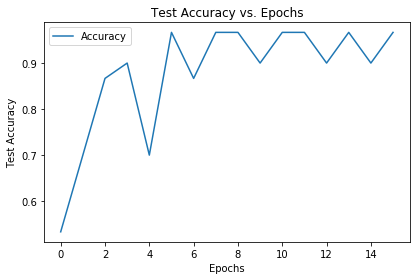

In [7]:
# graph of loss metrics over time
plt.ylabel('Test Accuracy')
plt.xlabel('Epochs')
plt.title('Test Accuracy vs. Epochs')
plt.tight_layout()
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Accuracy')
plt.legend()
plt.show()

In [8]:
# confusion matrix
y_test_pred = np.argmax(model.predict(x_test), axis=1)
confusion_matrix(y_test, y_test_pred)

array([[ 8,  0,  0],
       [ 0, 13,  1],
       [ 0,  0,  8]])